In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv
Saving testFeatures.csv to testFeatures.csv
Saving train.csv to train.csv


In [ ]:
import pandas as pd

try:
    df_submission = pd.read_csv('sample_submission.csv')
    display(df_submission.head())
    df_test = pd.read_csv('testFeatures.csv')
    display(df_test.head())
    df_train = pd.read_csv('train.csv')
    display(df_train.head())
except FileNotFoundError:
    print("One or more CSV files not found.")
except pd.errors.ParserError:
    print("Error parsing one or more CSV files.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,id,ürün fiyatı
0,0,98.45
1,1,48.55
2,2,39.78
3,3,25.00


,id,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir
0,0,2024-01-01,kıyma,120,et,Yurt içi,K,S
1,1,2024-01-01,tavuk,103,et,Yurt içi,K,S
2,2,2024-01-01,hindi,160,et,Yurt içi,K,S
3,3,2024-01-01,Bakla-kuru,354,sebze ve bakliyat,Yurt içi,K,S
4,4,2024-01-01,Bakla-taze,72,sebze ve bakliyat,Yurt içi,K,S


,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
0,2019-01-01,kıyma,120,et,32.70,Yurt içi,K,S
1,2019-01-01,tavuk,103,et,11.04,Yurt içi,K,S
2,2019-01-01,hindi,160,et,11.20,Yurt içi,K,S
3,2019-01-01,Bakla-kuru,354,sebze ve bakliyat,7.04,Yurt içi,K,S
4,2019-01-01,Bakla-taze,72,sebze ve bakliyat,13.28,Yurt içi,K,S


## Data exploration

### Subtask:
Explore the structure of the loaded DataFrames (`df_submission`, `df_test`, and `df_train`)


**Reasoning**:
Explore the structure of the dataframes, including shape, columns, data types, missing values, and summary statistics.



In [ ]:
# Data Shape and Columns
print("df_submission shape:", df_submission.shape)
print("df_submission columns:", df_submission.columns.tolist())
print("df_test shape:", df_test.shape)
print("df_test columns:", df_test.columns.tolist())
print("df_train shape:", df_train.shape)
print("df_train columns:", df_train.columns.tolist())

# Data Types
print("\ndf_submission data types:\n", df_submission.dtypes)
print("\ndf_test data types:\n", df_test.dtypes)
print("\ndf_train data types:\n", df_train.dtypes)

# Missing Values
print("\ndf_submission missing values:\n", df_submission.isnull().sum())
print("\ndf_test missing values:\n", df_test.isnull().sum())
print("\ndf_train missing values:\n", df_train.isnull().sum())

# Summary Statistics
print("\ndf_submission summary statistics:\n", df_submission.describe(include='all'))
print("\ndf_test summary statistics:\n", df_test.describe(include='all'))
print("\ndf_train summary statistics:\n", df_train.describe(include='all'))

# Additional exploration for categorical features in df_train
for col in ['ürün', 'ürün kategorisi', 'ürün üretim yeri', 'market', 'şehir']:
    print(f"\nUnique values and counts for '{col}' in df_train:")
    print(df_train[col].value_counts())

df_submission shape: (4, 2)
df_submission columns: ['id', 'ürün fiyatı']
df_test shape: (45504, 8)
df_test columns: ['id', 'tarih', 'ürün', 'ürün besin değeri', 'ürün kategorisi', 'ürün üretim yeri', 'market', 'şehir']
df_train shape: (227520, 8)
df_train columns: ['tarih', 'ürün', 'ürün besin değeri', 'ürün kategorisi', 'ürün fiyatı', 'ürün üretim yeri', 'market', 'şehir']

df_submission data types:
 id               int64
ürün fiyatı    float64
dtype: object

df_test data types:
 id                    int64
tarih                object
ürün                 object
ürün besin değeri     int64
ürün kategorisi      object
ürün üretim yeri     object
market               object
şehir                object
dtype: object

df_train data types:
 tarih                 object
ürün                  object
ürün besin değeri      int64
ürün kategorisi       object
ürün fiyatı          float64
ürün üretim yeri      object
market                object
şehir                 object
dtype: object

df_su

## Data exploration

### Subtask:
Analyze the "tarih" (date) column in "train.csv" and "testFeatures.csv" to determine the earliest and latest dates and the overall time range covered by the data.


**Reasoning**:
Convert the 'tarih' column in both DataFrames to datetime objects, find the minimum and maximum dates, calculate the time range, and print the results.



In [ ]:
import pandas as pd

# Convert 'tarih' column to datetime objects
try:
    df_train['tarih'] = pd.to_datetime(df_train['tarih'])
    df_test['tarih'] = pd.to_datetime(df_test['tarih'])
except Exception as e:
    print(f"An error occurred during datetime conversion: {e}")
    # Handle the error appropriately, e.g., skip the analysis or use a default date
    # For demonstration, we'll just print an error message and continue

# Find the minimum and maximum dates
try:
    min_date_train = df_train['tarih'].min()
    max_date_train = df_train['tarih'].max()
    min_date_test = df_test['tarih'].min()
    max_date_test = df_test['tarih'].max()
except Exception as e:
    print(f"An error occurred during min/max date calculation: {e}")

# Calculate the time range
try:
    time_range_train = max_date_train - min_date_train
    time_range_test = max_date_test - min_date_test
except Exception as e:
    print(f"An error occurred during time range calculation: {e}")

# Print the results
print("Train Data:")
print("Earliest Date:", min_date_train)
print("Latest Date:", max_date_train)
print("Time Range:", time_range_train)

print("\nTest Data:")
print("Earliest Date:", min_date_test)
print("Latest Date:", max_date_test)
print("Time Range:", time_range_test)

print("\nComparison:")
print("Do the datasets cover the same period?", min_date_train == min_date_test and max_date_train == max_date_test)


Train Data:
Earliest Date: 2019-01-01 00:00:00
Latest Date: 2023-12-01 00:00:00
Time Range: 1795 days 00:00:00

Test Data:
Earliest Date: 2024-01-01 00:00:00
Latest Date: 2024-12-01 00:00:00
Time Range: 335 days 00:00:00

Comparison:
Do the datasets cover the same period? False


## Data exploration

### Subtask:
Analyze the "ürün" (product name), "ürün besin değeri" (product nutritional value), and "ürün kategorisi" (product category) columns in all three datasets (`df_submission`, `df_test`, and `df_train`).


**Reasoning**:
Analyze the specified columns across the three datasets, focusing on unique values, distributions, inconsistencies, and cross-dataset comparisons.



In [ ]:
# Unique values and distributions
for col in ['ürün', 'ürün besin değeri', 'ürün kategorisi']:
    print(f"\nAnalysis for column: {col}")
    print("-" * 20)
    for df_name, df in zip(['df_submission', 'df_test', 'df_train'], [df_submission, df_test, df_train]):
        if col in df.columns:
            print(f"\nDataFrame: {df_name}")
            print(f"Unique values: {df[col].unique()}")
            print(f"Value counts:\n{df[col].value_counts()}")
            if col == 'ürün besin değeri':
                print(f"Descriptive statistics:\n{df[col].describe()}")
        else:
            print(f"Column '{col}' not found in DataFrame: {df_name}")

# Cross-dataset comparison
print("\nCross-dataset comparison")
print("-" * 20)

for col in ['ürün', 'ürün kategorisi']:
    train_unique = set(df_train[col].unique())
    test_unique = set(df_test[col].unique())

    print(f"\nColumn: {col}")
    print(f"In train but not in test: {train_unique - test_unique}")
    print(f"In test but not in train: {test_unique - train_unique}")


Analysis for column: ürün
--------------------
Column 'ürün' not found in DataFrame: df_submission

DataFrame: df_test
Unique values: ['kıyma' 'tavuk' 'hindi' 'Bakla-kuru' 'Bakla-taze' 'Bamya' 'Barbunya-kuru'
 'Bezelye-taze' 'Biber-yeşil' 'Brüksel laha.' 'Domates' 'Enginar'
 'Fasulye-kuru' 'Fasulye-taze' 'Havuç' 'Salatalık' 'Ispanak' 'Kabak'
 'Karnabahar' 'Kereviz-baş' 'Kırmızı-pancar' 'Lahana' 'Mantar' 'Marul'
 'Mercimek-kuru' 'Nohut' 'Pancar' 'Patates' 'Patlıcan' 'Pazı' 'Pırasa'
 'Semizotu' 'Buğday ekmeği' 'Bulgur' 'Erişte' 'Makarna' 'Mısır'
 'Mısır unu' 'Nişasta' 'Pilav' 'Pirinç unu' 'Şehriye' 'Tarhana'
 'Yulaf unu' 'yumurta' 'beyaz peynir' 'Kaşar peyniri' 'krema' 'yoğurt'
 'sucuk' 'salam' 'sosis' 'tam buğday ekmek' 'kaymak' 'bal' 'tereyağ'
 'Armut' 'Çilek' 'Elma' 'Erik türleri' 'İncir' 'Karadut' 'Karpuz' 'Kavun'
 'Kayısı' 'Kiraz' 'Limon' 'Mandalina' 'Muz' 'Nar' 'Portakal' 'Şeftali'
 'Üzüm' 'Vişne' 'fındık' 'fıstık' 'kaju' 'badem' 'ceviz']
Value counts:
ürün
kıyma         576
tavuk

## Data wrangling

### Subtask:
Convert the 'tarih' column to datetime objects and extract year, month, and day as new features in both the 'df_train' and 'df_test' DataFrames.


**Reasoning**:
Convert the 'tarih' column to datetime objects and extract year, month, and day as new features in both the 'df_train' and 'df_test' DataFrames.



In [ ]:
# Convert 'tarih' column to datetime objects
df_train['tarih'] = pd.to_datetime(df_train['tarih'])
df_test['tarih'] = pd.to_datetime(df_test['tarih'])

# Extract year, month, and day
df_train['year'] = df_train['tarih'].dt.year
df_train['month'] = df_train['tarih'].dt.month
df_train['day'] = df_train['tarih'].dt.day

df_test['year'] = df_test['tarih'].dt.year
df_test['month'] = df_test['tarih'].dt.month
df_test['day'] = df_test['tarih'].dt.day

# Verify the changes
display(df_train.head())
print(df_train[['year', 'month', 'day']].dtypes)
display(df_test.head())
print(df_test[['year', 'month', 'day']].dtypes)

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,year,month,day
0,2019-01-01,kıyma,120,et,32.70,Yurt içi,K,S,2019,1,1
1,2019-01-01,tavuk,103,et,11.04,Yurt içi,K,S,2019,1,1
2,2019-01-01,hindi,160,et,11.20,Yurt içi,K,S,2019,1,1
3,2019-01-01,Bakla-kuru,354,sebze ve bakliyat,7.04,Yurt içi,K,S,2019,1,1
4,2019-01-01,Bakla-taze,72,sebze ve bakliyat,13.28,Yurt içi,K,S,2019,1,1


year     int32
month    int32
day      int32
dtype: object


,id,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir,year,month,day
0,0,2024-01-01,kıyma,120,et,Yurt içi,K,S,2024,1,1
1,1,2024-01-01,tavuk,103,et,Yurt içi,K,S,2024,1,1
2,2,2024-01-01,hindi,160,et,Yurt içi,K,S,2024,1,1
3,3,2024-01-01,Bakla-kuru,354,sebze ve bakliyat,Yurt içi,K,S,2024,1,1
4,4,2024-01-01,Bakla-taze,72,sebze ve bakliyat,Yurt içi,K,S,2024,1,1


year     int32
month    int32
day      int32
dtype: object


## Data wrangling

### Subtask:
Encode categorical features ('ürün', 'ürün kategorisi') and handle potential outliers in 'ürün besin değeri' in `df_train` and `df_test`.


**Reasoning**:
Encode categorical features ('ürün', 'ürün kategorisi') using Label Encoding and One-Hot Encoding respectively, and handle outliers in 'ürün besin değeri' using the IQR method in both `df_train` and `df_test`.



In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

# Label Encoding for 'ürün'
le = LabelEncoder()
df_train['ürün'] = le.fit_transform(df_train['ürün'])
df_test['ürün'] = le.transform(df_test['ürün'])

# One-Hot Encoding for 'ürün kategorisi'
# Combine categories from both train and test sets
all_categories = np.union1d(df_train['ürün kategorisi'].unique(), df_test['ürün kategorisi'].unique())

# Create OneHotEncoder object
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder on combined categories and transform both train and test data
encoded_categories = enc.fit_transform(all_categories.reshape(-1,1))
encoded_df_train = enc.transform(df_train['ürün kategorisi'].values.reshape(-1,1))
encoded_df_test = enc.transform(df_test['ürün kategorisi'].values.reshape(-1,1))

# Create column names for one-hot encoded features
encoded_column_names = [f"ürün kategorisi_{cat}" for cat in all_categories]

# Create new dataframes with one-hot encoded columns
encoded_df_train = pd.DataFrame(encoded_df_train, columns=encoded_column_names)
encoded_df_test = pd.DataFrame(encoded_df_test, columns=encoded_column_names)

# Concatenate the encoded features with original dataframes
df_train = pd.concat([df_train, encoded_df_train], axis=1)
df_test = pd.concat([df_test, encoded_df_test], axis=1)

# Outlier handling for 'ürün besin değeri' using IQR
Q1 = df_train['ürün besin değeri'].quantile(0.25)
Q3 = df_train['ürün besin değeri'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_train['ürün besin değeri'] = np.clip(df_train['ürün besin değeri'], lower_bound, upper_bound)
df_test['ürün besin değeri'] = np.clip(df_test['ürün besin değeri'], lower_bound, upper_bound)

# Display first few rows and data types to verify changes
display(df_train.head())
print(df_train[['ürün', 'ürün besin değeri'] + encoded_column_names].dtypes)
display(df_test.head())
print(df_test[['ürün', 'ürün besin değeri'] + encoded_column_names].dtypes)

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,year,month,day,ürün kategorisi_et,ürün kategorisi_kuruyemiş,ürün kategorisi_meyve,ürün kategorisi_sebze ve bakliyat,ürün kategorisi_süt ürünleri ve kahvaltılık,ürün kategorisi_tahıl ve ürünleri
0,2019-01-01,65,120,et,32.70,Yurt içi,K,S,2019,1,1,1.0,0.0,0.0,0.0,0.0,0.0
1,2019-01-01,70,103,et,11.04,Yurt içi,K,S,2019,1,1,1.0,0.0,0.0,0.0,0.0,0.0
2,2019-01-01,61,160,et,11.20,Yurt içi,K,S,2019,1,1,1.0,0.0,0.0,0.0,0.0,0.0
3,2019-01-01,1,354,sebze ve bakliyat,7.04,Yurt içi,K,S,2019,1,1,0.0,0.0,0.0,1.0,0.0,0.0
4,2019-01-01,2,72,sebze ve bakliyat,13.28,Yurt içi,K,S,2019,1,1,0.0,0.0,0.0,1.0,0.0,0.0


ürün                                             int64
ürün besin değeri                                int64
ürün kategorisi_et                             float64
ürün kategorisi_kuruyemiş                      float64
ürün kategorisi_meyve                          float64
ürün kategorisi_sebze ve bakliyat              float64
ürün kategorisi_süt ürünleri ve kahvaltılık    float64
ürün kategorisi_tahıl ve ürünleri              float64
dtype: object


,id,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir,year,month,day,ürün kategorisi_et,ürün kategorisi_kuruyemiş,ürün kategorisi_meyve,ürün kategorisi_sebze ve bakliyat,ürün kategorisi_süt ürünleri ve kahvaltılık,ürün kategorisi_tahıl ve ürünleri
0,0,2024-01-01,65,120,et,Yurt içi,K,S,2024,1,1,1.0,0.0,0.0,0.0,0.0,0.0
1,1,2024-01-01,70,103,et,Yurt içi,K,S,2024,1,1,1.0,0.0,0.0,0.0,0.0,0.0
2,2,2024-01-01,61,160,et,Yurt içi,K,S,2024,1,1,1.0,0.0,0.0,0.0,0.0,0.0
3,3,2024-01-01,1,354,sebze ve bakliyat,Yurt içi,K,S,2024,1,1,0.0,0.0,0.0,1.0,0.0,0.0
4,4,2024-01-01,2,72,sebze ve bakliyat,Yurt içi,K,S,2024,1,1,0.0,0.0,0.0,1.0,0.0,0.0


ürün                                             int64
ürün besin değeri                                int64
ürün kategorisi_et                             float64
ürün kategorisi_kuruyemiş                      float64
ürün kategorisi_meyve                          float64
ürün kategorisi_sebze ve bakliyat              float64
ürün kategorisi_süt ürünleri ve kahvaltılık    float64
ürün kategorisi_tahıl ve ürünleri              float64
dtype: object


## Data analysis

### Subtask:
Analyze the relationship between the engineered features and the target variable ('ürün fiyatı') in the training dataset (`df_train`)


**Reasoning**:
Calculate the correlation between features and the target variable ('ürün fiyatı') in df_train, visualize the correlations using a heatmap, and then create visualizations to explore the relationships between highly correlated features and the target variable.



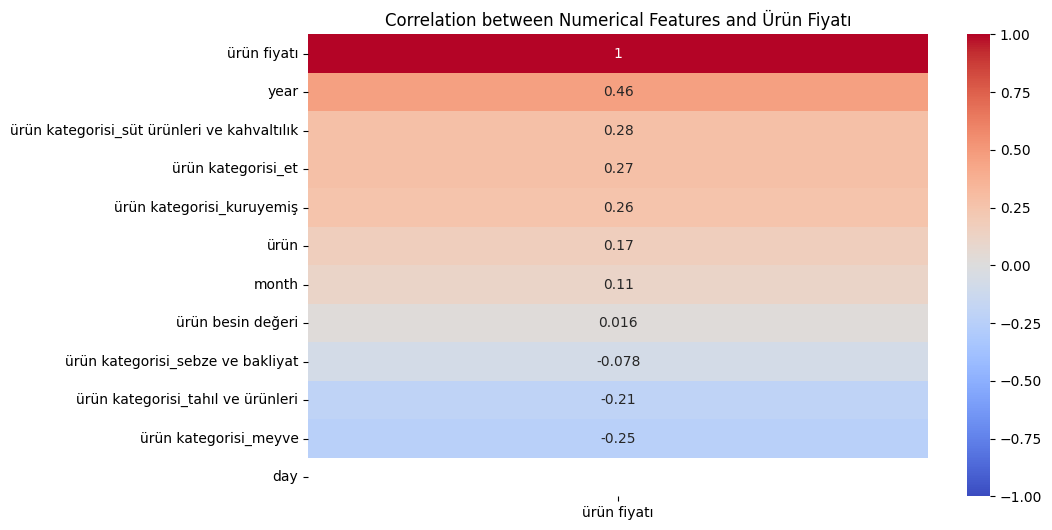

Highly correlated numerical features: ['ürün', 'year', 'month', 'ürün kategorisi_et', 'ürün kategorisi_kuruyemiş', 'ürün kategorisi_meyve', 'ürün kategorisi_süt ürünleri ve kahvaltılık', 'ürün kategorisi_tahıl ve ürünleri']


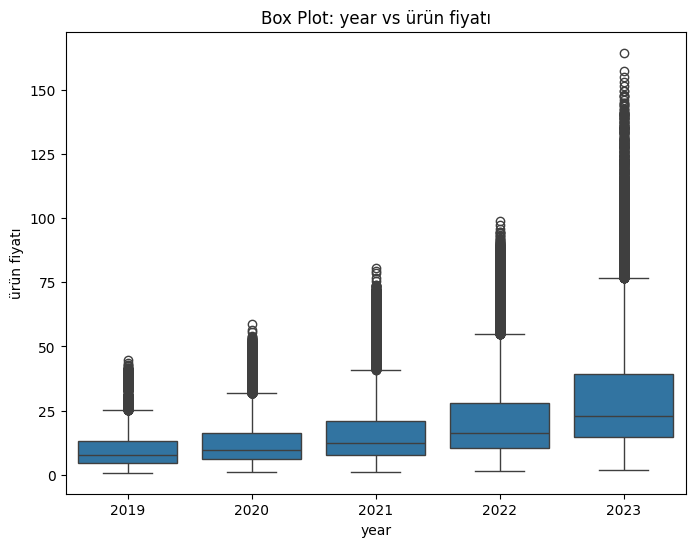

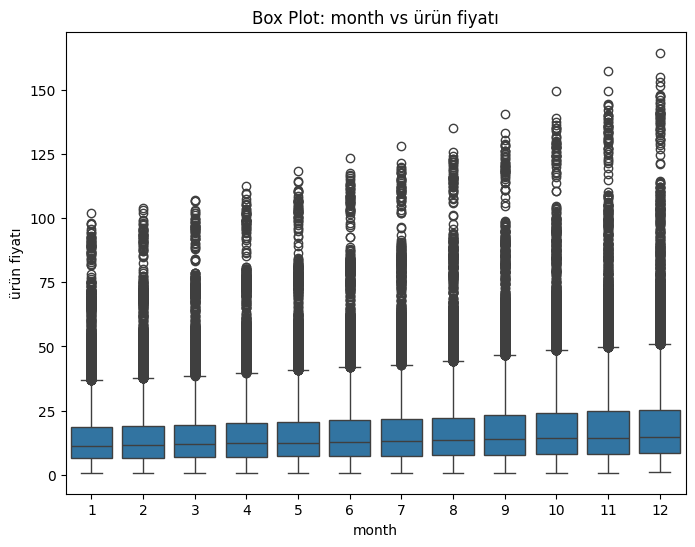

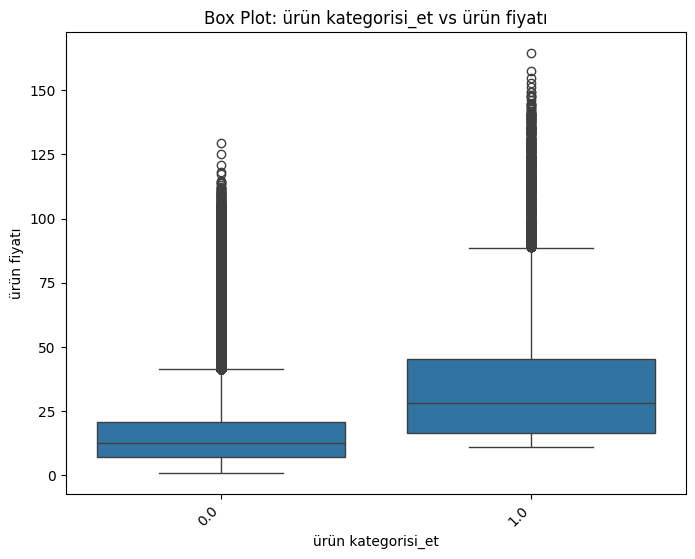

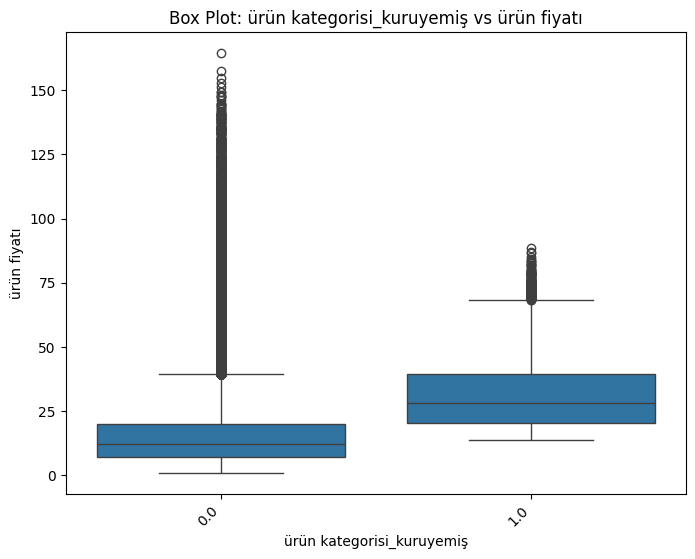

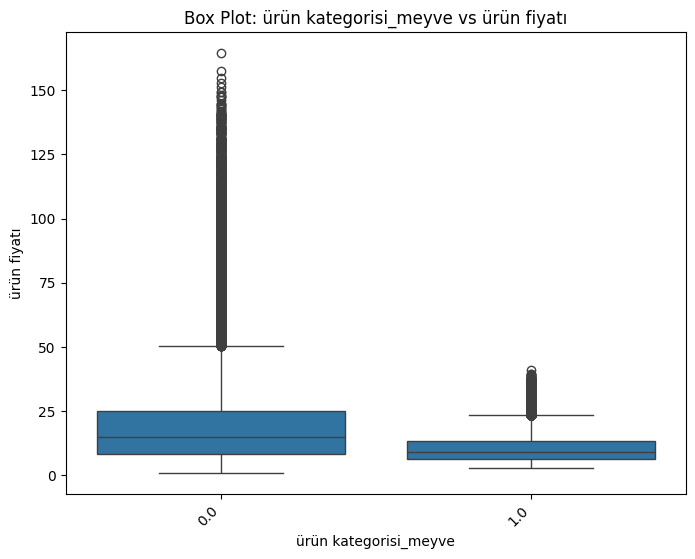

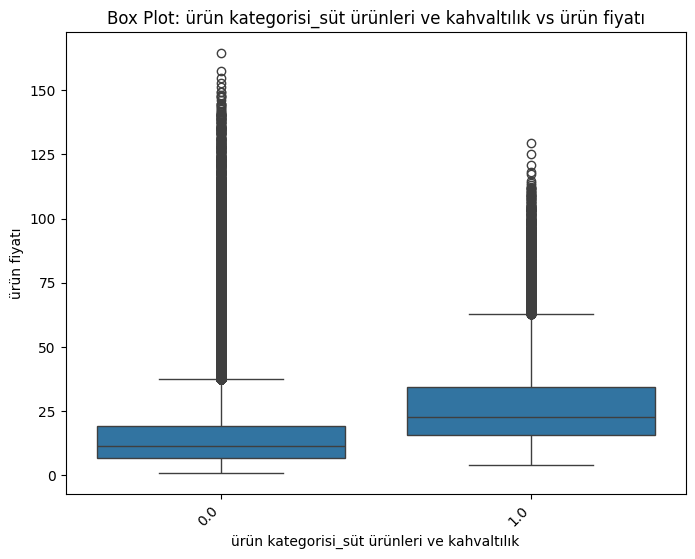

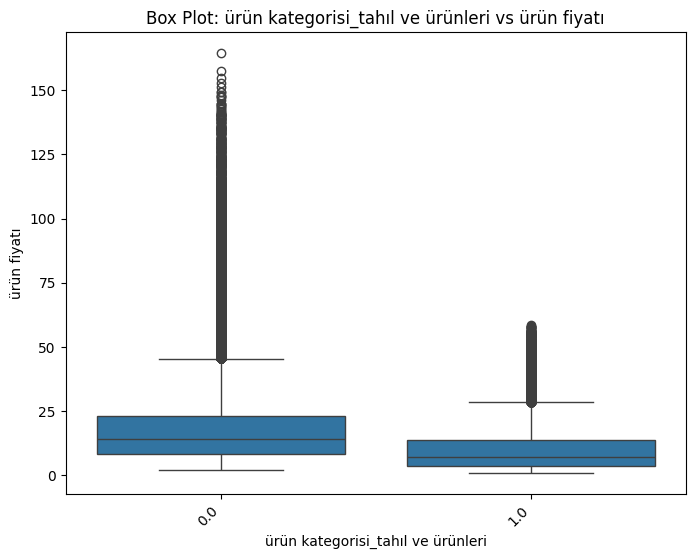

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation
numerical_cols = df_train.select_dtypes(include=['number']).columns
correlations = df_train[numerical_cols].corr()['ürün fiyatı'].drop('ürün fiyatı')

# Visualize correlations with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_train[numerical_cols].corr()[['ürün fiyatı']].sort_values(by='ürün fiyatı', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Numerical Features and Ürün Fiyatı')
plt.show()

# Identify highly correlated features (numerical only)
high_corr_features = correlations[abs(correlations) > 0.1].index.tolist()
print(f"Highly correlated numerical features: {high_corr_features}")

# Visualize relationships between highly correlated features and target variable
for feature in high_corr_features:
    if feature == 'ürün besin değeri':
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x='ürün besin değeri', y='ürün fiyatı', data=df_train)
        plt.title(f'Scatter Plot: ürün besin değeri vs ürün fiyatı')
        plt.show()
    elif feature.startswith('ürün kategorisi_'):
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=feature, y='ürün fiyatı', data=df_train)
        plt.title(f'Box Plot: {feature} vs ürün fiyatı')
        plt.xticks(rotation=45, ha='right')
        plt.show()
    elif feature in ['year', 'month', 'day']:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=feature, y='ürün fiyatı', data=df_train)
        plt.title(f'Box Plot: {feature} vs ürün fiyatı')
        plt.show()

**Reasoning**:
The previous code failed due to a `ValueError` when converting strings to floats during correlation calculation. This suggests that some columns intended for numerical operations contain string values.  We need to correct this before proceeding.  I will exclude non-numeric columns from the correlation calculation.



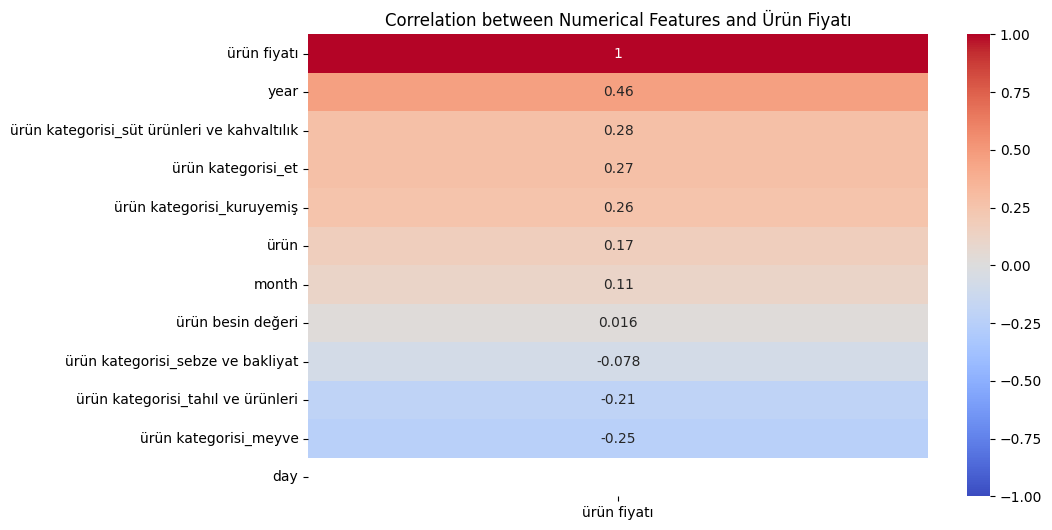

Highly correlated numerical features: ['ürün', 'year', 'month', 'ürün kategorisi_et', 'ürün kategorisi_kuruyemiş', 'ürün kategorisi_meyve', 'ürün kategorisi_süt ürünleri ve kahvaltılık', 'ürün kategorisi_tahıl ve ürünleri']


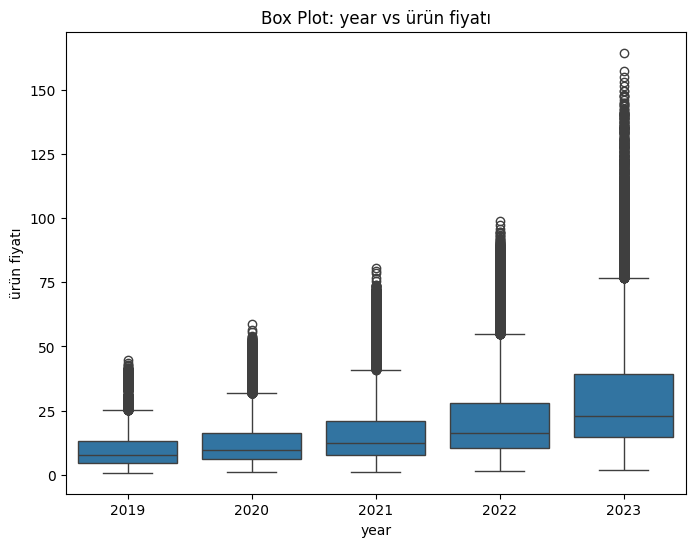

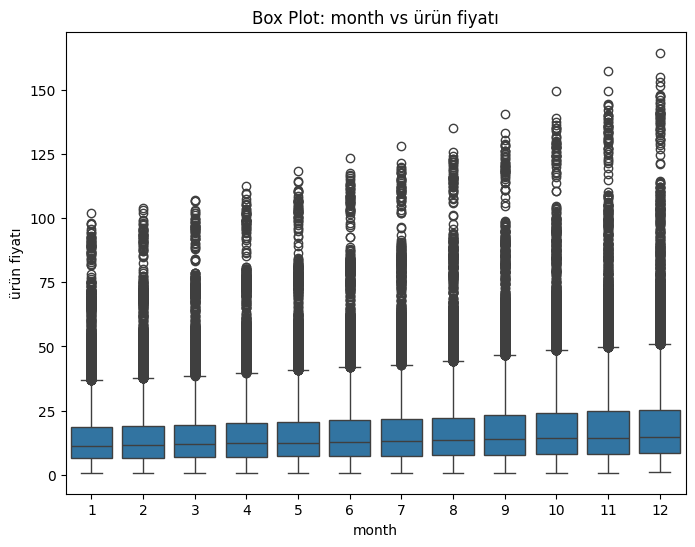

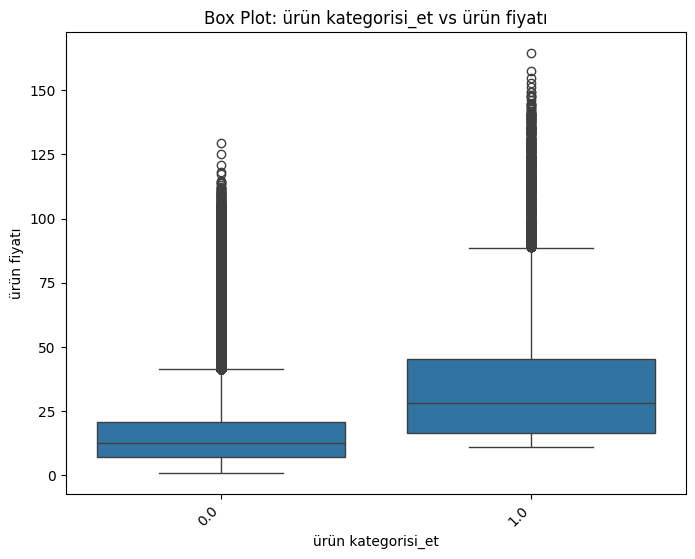

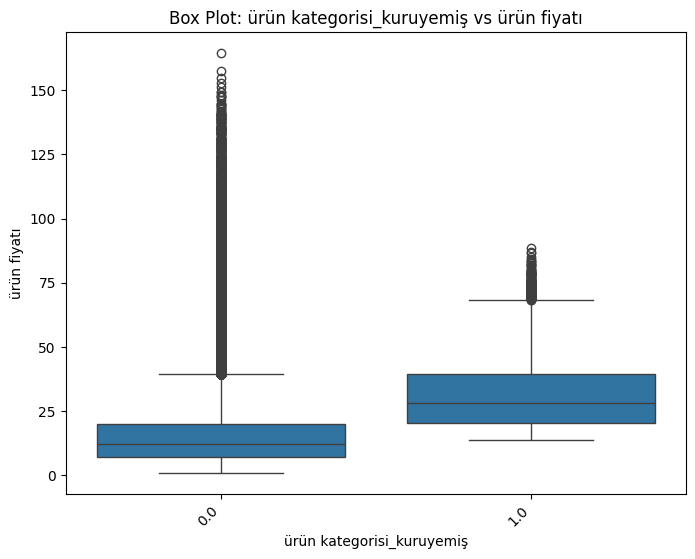

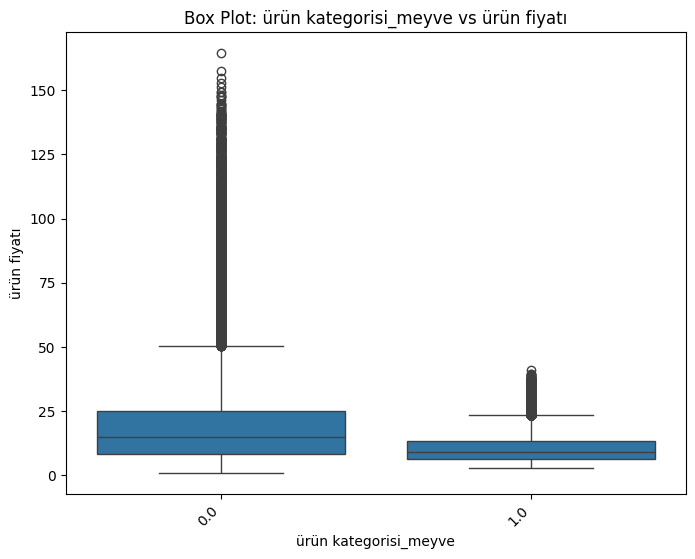

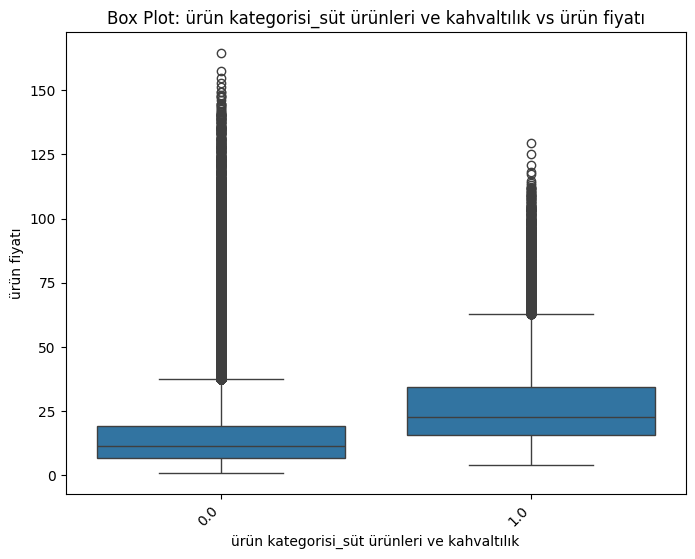

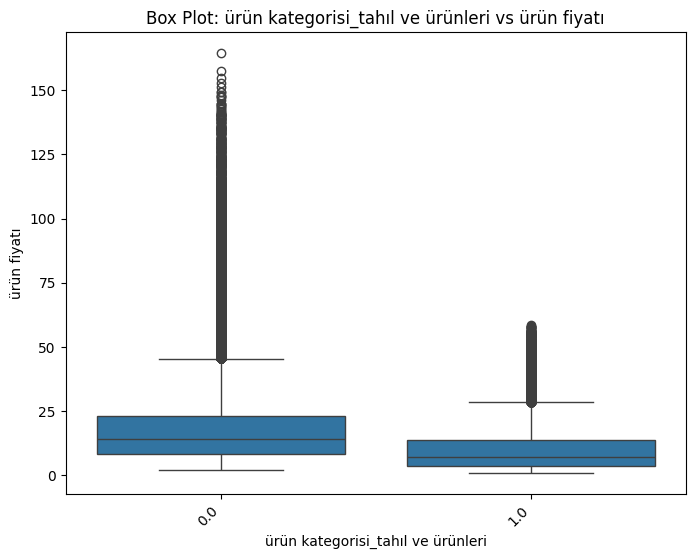

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation
numerical_cols = df_train.select_dtypes(include=['number']).columns
correlations = df_train[numerical_cols].corr()['ürün fiyatı'].drop('ürün fiyatı')

# Visualize correlations with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_train[numerical_cols].corr()[['ürün fiyatı']].sort_values(by='ürün fiyatı', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Numerical Features and Ürün Fiyatı')
plt.show()

# Identify highly correlated features (numerical only)
high_corr_features = correlations[abs(correlations) > 0.1].index.tolist()
print(f"Highly correlated numerical features: {high_corr_features}")

# Visualize relationships between highly correlated features and target variable
for feature in high_corr_features:
    if feature == 'ürün besin değeri':
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x='ürün besin değeri', y='ürün fiyatı', data=df_train)
        plt.title(f'Scatter Plot: ürün besin değeri vs ürün fiyatı')
        plt.show()
    elif feature.startswith('ürün kategorisi_'):
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=feature, y='ürün fiyatı', data=df_train)
        plt.title(f'Box Plot: {feature} vs ürün fiyatı')
        plt.xticks(rotation=45, ha='right')
        plt.show()
    elif feature in ['year', 'month', 'day']:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=feature, y='ürün fiyatı', data=df_train)
        plt.title(f'Box Plot: {feature} vs ürün fiyatı')
        plt.show()

## Data analysis

### Subtask:
Compare the distributions of features in `df_train` and `df_test` to ensure consistency and identify potential discrepancies.


**Reasoning**:
Generate the code to compare the distributions of numerical and categorical features between df_train and df_test.



Descriptive statistics for ürün:
------------------------------
df_train:
count    227520.000000
mean         39.000000
std          22.803559
min           0.000000
25%          19.000000
50%          39.000000
75%          59.000000
max          78.000000
Name: ürün, dtype: float64

 df_test:
count    45504.000000
mean        39.000000
std         22.803759
min          0.000000
25%         19.000000
50%         39.000000
75%         59.000000
max         78.000000
Name: ürün, dtype: float64


Descriptive statistics for ürün besin değeri:
------------------------------
df_train:
count    227520.000000
mean        143.113924
std         133.218871
min           8.000000
25%          41.000000
50%          83.000000
75%         250.000000
max         402.000000
Name: ürün besin değeri, dtype: float64

 df_test:
count    45504.000000
mean       143.113924
std        133.220042
min          8.000000
25%         41.000000
50%         83.000000
75%        250.000000
max        402.000000
N

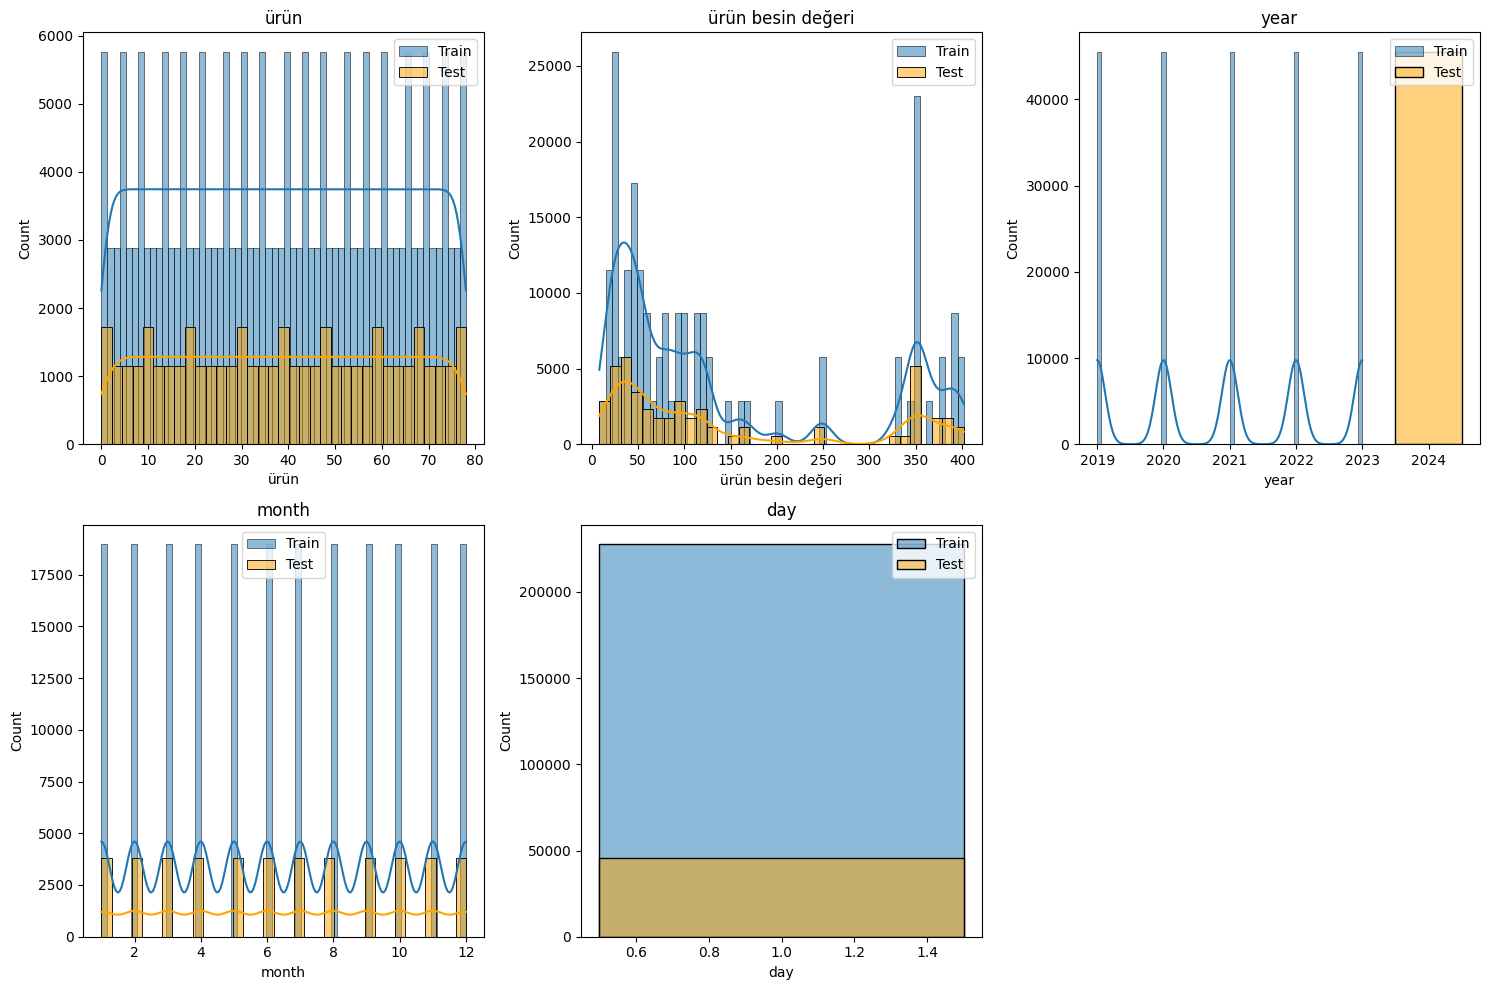

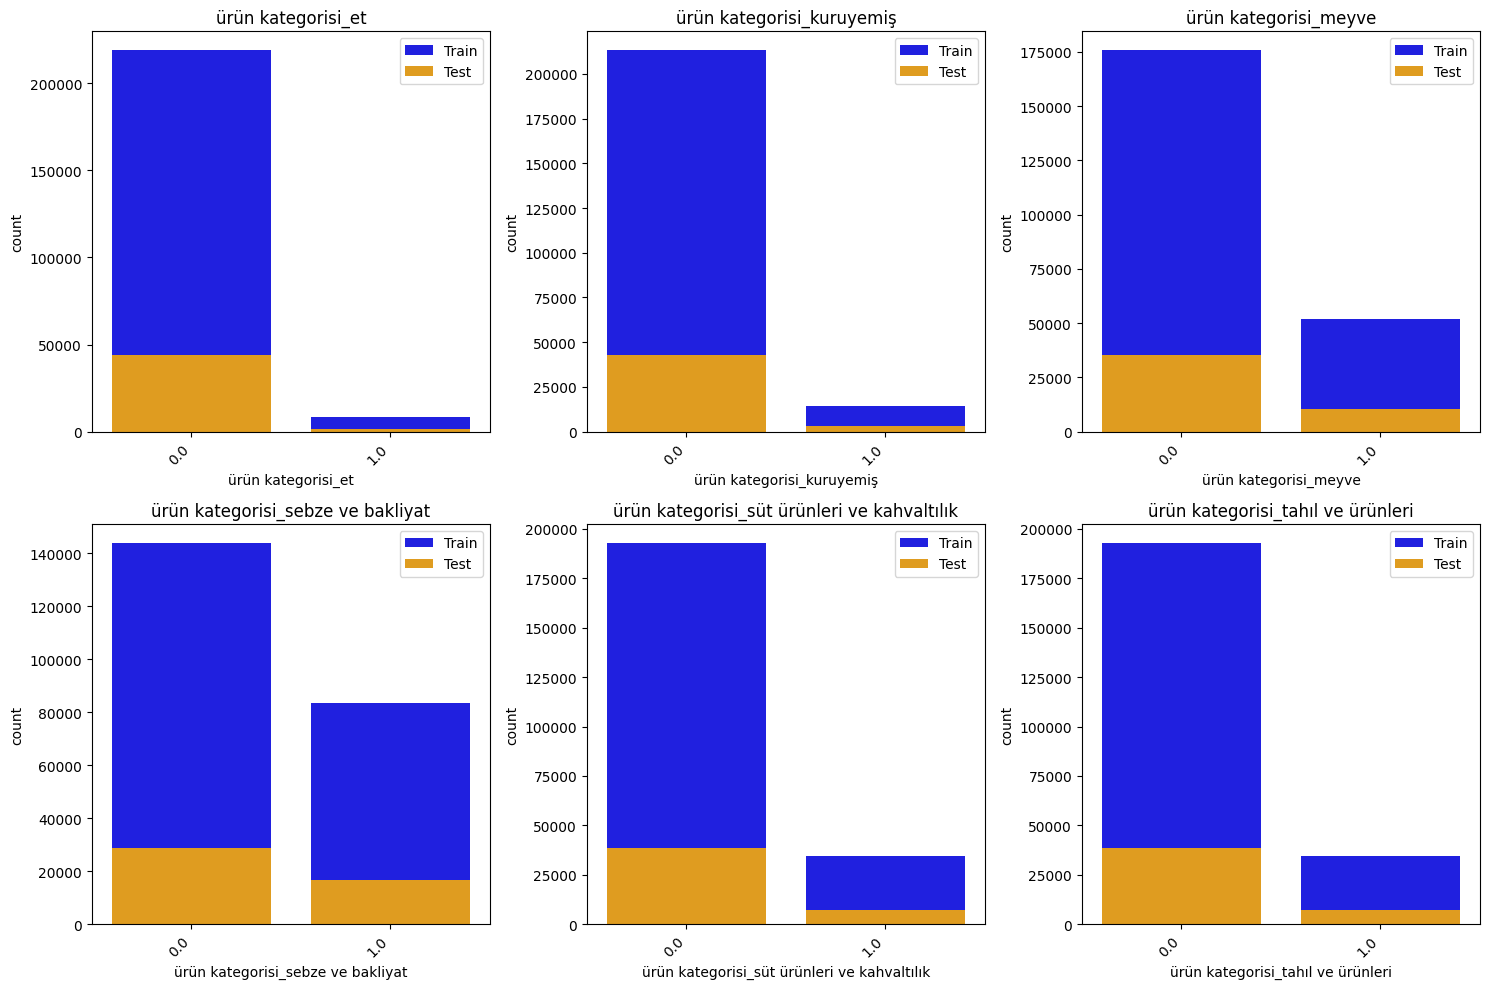

Unique values of ürün kategorisi_et in train: [1. 0.]
Unique values of ürün kategorisi_et in test: [1. 0.]
Unique values of ürün kategorisi_kuruyemiş in train: [0. 1.]
Unique values of ürün kategorisi_kuruyemiş in test: [0. 1.]
Unique values of ürün kategorisi_meyve in train: [0. 1.]
Unique values of ürün kategorisi_meyve in test: [0. 1.]
Unique values of ürün kategorisi_sebze ve bakliyat in train: [0. 1.]
Unique values of ürün kategorisi_sebze ve bakliyat in test: [0. 1.]
Unique values of ürün kategorisi_süt ürünleri ve kahvaltılık in train: [0. 1.]
Unique values of ürün kategorisi_süt ürünleri ve kahvaltılık in test: [0. 1.]
Unique values of ürün kategorisi_tahıl ve ürünleri in train: [0. 1.]
Unique values of ürün kategorisi_tahıl ve ürünleri in test: [0. 1.]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Numerical features
numerical_features = ['ürün', 'ürün besin değeri', 'year', 'month', 'day']

# Descriptive statistics
for feature in numerical_features:
    print(f"Descriptive statistics for {feature}:")
    print("-" * 30)
    print("df_train:")
    print(df_train[feature].describe())
    print("\n df_test:")
    print(df_test[feature].describe())
    print("\n")

# Histograms for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
  plt.subplot(2,3,i+1)
  sns.histplot(df_train[feature], label='Train', kde=True)
  sns.histplot(df_test[feature], label='Test', kde=True, color='orange')
  plt.legend()
  plt.title(feature)
plt.tight_layout()
plt.show()


# Categorical features
categorical_features = ['ürün kategorisi_et', 'ürün kategorisi_kuruyemiş', 'ürün kategorisi_meyve', 'ürün kategorisi_sebze ve bakliyat', 'ürün kategorisi_süt ürünleri ve kahvaltılık', 'ürün kategorisi_tahıl ve ürünleri']

# Bar plots for categorical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=feature, data=df_train, label='Train', color='blue')
    sns.countplot(x=feature, data=df_test, label='Test', color='orange')
    plt.legend()
    plt.title(feature)
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Compare unique values of categorical features
for col in ['ürün kategorisi_et', 'ürün kategorisi_kuruyemiş', 'ürün kategorisi_meyve', 'ürün kategorisi_sebze ve bakliyat', 'ürün kategorisi_süt ürünleri ve kahvaltılık', 'ürün kategorisi_tahıl ve ürünleri']:
  print(f"Unique values of {col} in train: {df_train[col].unique()}")
  print(f"Unique values of {col} in test: {df_test[col].unique()}")

In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# ... (your previous code for data loading, exploration, and wrangling) ...

# Convert 'ürün besin değeri' to numeric, handling errors
df_train['ürün besin değeri'] = pd.to_numeric(df_train['ürün besin değeri'], errors='coerce')
df_test['ürün besin değeri'] = pd.to_numeric(df_test['ürün besin değeri'], errors='coerce')

# Fill NaN values with the mean
df_train['ürün besin değeri'].fillna(df_train['ürün besin değeri'].mean(), inplace=True)
df_test['ürün besin değeri'].fillna(df_test['ürün besin değeri'].mean(), inplace=True)

# Combine data preparation, model training, and prediction into a single block
X = df_train.drop(columns=['ürün fiyatı', 'tarih', 'ürün kategorisi', 'ürün üretim yeri']) # Features - drop 'ürün üretim yeri'
y = df_train['ürün fiyatı'] # Target variable
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # Split data into training and validation sets

# Before fitting, ensure all columns in X_train are numeric
# This will identify and handle the problematic column with the 'Y' value.
for col in X_train.columns:
    if X_train[col].dtype == 'object':  # If column is of type 'object' (string)
        try:
            X_train[col] = X_train[col].astype(float)  # Attempt to convert to float
        except ValueError:
            print(f"Column '{col}' contains non-numeric values and needs further processing.")

            # Instead of dropping, let's label encode the problematic column:
            le = LabelEncoder()
            X_train[col] = le.fit_transform(X_train[col])
            X_val[col] = le.transform(X_val[col])  # Apply the same encoding to validation set
            X[col] = le.transform(X[col])  # Apply the same encoding to the original feature set

# Model training
model = RandomForestRegressor(random_state=42) # Initialize RandomForestRegressor
model.fit(X_train, y_train) # Train the model

# ... (rest of your code) ...

<ipython-input-29-24d45968054b>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['ürün besin değeri'].fillna(df_train['ürün besin değeri'].mean(), inplace=True)
<ipython-input-29-24d45968054b>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

Column 'market' contains non-numeric values and needs further processing.
Column 'şehir' contains non-numeric values and needs further processing.


RandomForestRegressor(random_state=42)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# ... (your previous code for data loading, exploration, and wrangling) ...

# Convert 'ürün besin değeri' to numeric, handling errors
df_train['ürün besin değeri'] = pd.to_numeric(df_train['ürün besin değeri'], errors='coerce')
df_test['ürün besin değeri'] = pd.to_numeric(df_test['ürün besin değeri'], errors='coerce')

# Fill NaN values with the mean
df_train['ürün besin değeri'].fillna(df_train['ürün besin değeri'].mean(), inplace=True)
df_test['ürün besin değeri'].fillna(df_test['ürün besin değeri'].mean(), inplace=True)

# Combine data preparation, model training, and prediction into a single block
X = df_train.drop(columns=['ürün fiyatı', 'tarih', 'ürün kategorisi', 'ürün üretim yeri']) # Features - drop 'ürün üretim yeri'
y = df_train['ürün fiyatı'] # Target variable
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # Split data into training and validation sets

# Before fitting, ensure all columns in X_train are numeric
# This will identify and handle the problematic column with the 'Y' value.
for col in X_train.columns:
    if X_train[col].dtype == 'object':  # If column is of type 'object' (string)
        try:
            X_train[col] = X_train[col].astype(float)  # Attempt to convert to float
        except ValueError:
            print(f"Column '{col}' contains non-numeric values and needs further processing.")

            # Instead of dropping, let's label encode the problematic column:
            le = LabelEncoder()
            X_train[col] = le.fit_transform(X_train[col])
            X_val[col] = le.transform(X_val[col])  # Apply the same encoding to validation set
            X[col] = le.transform(X[col])  # Apply the same encoding to the original feature set
            # Also, transform the corresponding column in the test set if it exists
            if col in df_test.columns:
                df_test[col] = le.transform(df_test[col])


# Model training
model = RandomForestRegressor(random_state=42) # Initialize RandomForestRegressor
model.fit(X_train, y_train) # Train the model

# Make predictions on the test set
X_test = df_test.drop(columns=['id', 'tarih', 'ürün kategorisi', 'ürün üretim yeri'])
predictions = model.predict(X_test)

# Submission formatında DataFrame oluşturma
submission_df = pd.DataFrame({'id': df_test['id'], 'ürün fiyatı': predictions})

# CSV dosyasına dışarı aktarma
submission_df.to_csv('submission.csv', index=False)

# DataFrame'i yazdırma
print(submission_df)

<ipython-input-30-7b4c6d35d0eb>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['ürün besin değeri'].fillna(df_train['ürün besin değeri'].mean(), inplace=True)
<ipython-input-30-7b4c6d35d0eb>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

Column 'market' contains non-numeric values and needs further processing.
Column 'şehir' contains non-numeric values and needs further processing.
          id  ürün fiyatı
0          0    89.422067
1          1    28.274520
2          2    33.062788
3          3    17.897283
4          4    33.190888
...      ...          ...
45499  45499    62.075396
45500  45500    67.632627
45501  45501    67.054339
45502  45502    63.732008
45503  45503    72.020107

[45504 rows x 2 columns]


In [ ]:
import pandas as pd

# CSV dosyasını oku
df = pd.read_csv('submission.csv')

# 'ürün fiyatı' sütunundaki değerleri 2 ondalık haneye yuvarla
df['ürün fiyatı'] = df['ürün fiyatı'].round(2)

# Güncellenmiş CSV'yi kaydet

df.to_csv('submission_updated_v6.csv', index=False)